In [44]:
import pandas as pd 
import numpy as np
import os
from pathlib import Path

<AxesSubplot:xlabel='0'>

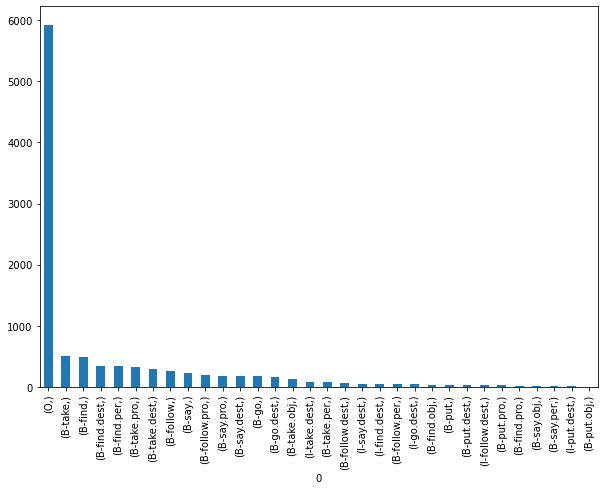

In [121]:
in_path = "./Dataset/dataset_seq_in.txt"

with open(in_path, encoding='utf-8') as f:
    seq_in = [line.rstrip().split() for line in f if line != '\n' ]


out_path = "./Dataset/dataset_seq_out.txt"

with open(out_path, encoding='utf-8') as f:
    seq_out = [line.rstrip().split() for line in f if line != '\n']


label_df = pd.DataFrame( x for seq in seq_out for x in seq)
# display(label_df.head(5))
label_df.value_counts(subset=None, dropna = True).plot(kind = 'bar', figsize = (10,7))

In [123]:
val_coun = label_df.value_counts(subset=None, dropna = True)

intent_label_lst = [label[0] for label in val_coun.index if '.' not in label[0]]
slot_label_lst = [label[0] for label in val_coun.index if '.' in label[0]]

print('intent_label_lst: \n',intent_label_lst,'\n')
print('slot_label_lst: \n',slot_label_lst)

intent_label_lst: 
 ['O', 'B-take', 'B-find', 'B-follow', 'B-say', 'B-go', 'B-put'] 

slot_label_lst: 
 ['B-find.dest', 'B-find.per', 'B-take.pro', 'B-take.dest', 'B-follow.pro', 'B-say.pro', 'B-say.dest', 'B-go.dest', 'B-take.obj', 'I-take.dest', 'B-take.per', 'B-follow.dest', 'I-say.dest', 'I-find.dest', 'B-follow.per', 'I-go.dest', 'B-find.obj', 'B-put.dest', 'I-follow.dest', 'B-put.pro', 'B-find.pro', 'B-say.obj', 'B-say.per', 'I-put.dest', 'B-put.obj']


In [125]:
def parse_seq(seq_in, seq_out):
    intent_label_lst = [ele for ele in seq_out if ele != 'O' and '.' not in ele]
    command = " ".join(seq_in)
    return {
        'intent_label': intent_label_lst,
        'words': command,
        'words_label': " ".join(seq_out),
        'length': len(seq_in)
    }


def get_dataframe(seq_in,seq_out):
    parsed = [parse_seq(seq_in[i], seq_out[i]) for i in range(len(seq_in))]
    return pd.DataFrame([p for p in parsed if p is not None])

def df_for_envs(env_names):
    envs = env_names.copy()
    for env,name_lst in env_names.items():
        for name in name_lst:
            path = f'./Dataset/{env}/{name}.txt'
            #path = './Dataset/' + name + '.txt'
            with open(path, encoding='utf-8') as f:
                if 'X' in name:
                    seq_in = [line.rstrip().split() for line in f if line != '\n' ]
                elif 'Y' in name:
                    seq_out = [line.rstrip().split() for line in f if line != '\n' ]
                    
        envs.update({env : get_dataframe(seq_in,seq_out)})
    return envs
            
env_names = {'train':['X_train', 'Y_train'], 'val':['X_val', 'Y_val'], 'test':['X_test','Y_test']}
envs = df_for_envs(env_names)


for env,df in envs.items():
    print(env,'\n')
    print('min length: ', min(df['length']))
    print('max length: ', max(df['length']))
    display(df)
    print('------------------------------------------------------------------')

train 

min length:  2
max length:  19


,intent_label,words,words_label,length
0,[B-take],could you please give me the apple from the si...,O O O B-take B-take.pro O B-take.obj O O B-tak...,11
1,"[B-find, B-follow, B-take]",meet francis at the desk follow him and escort...,B-find B-find.per O O B-find.dest B-follow B-f...,11
2,[B-say],say the time to the person pointing to the lef...,B-say O O O O O O O O O O O B-say.dest,13
3,[B-take],take mary from the dishwasher to the couch,B-take B-take.per O O B-take.dest O O O,8
4,[B-say],tell me the gender of the person at the dining...,B-say B-say.pro O O O O O O O B-say.dest I-say...,11
...,...,...,...,...
745,"[B-find, B-follow, B-take]",meet john at the bed follow him and take him back,B-find B-find.per O O B-find.dest B-follow B-f...,11
746,[B-take],take the chocolate drink to the bookcase,B-take O O B-take.obj O O B-take.dest,7
747,[B-say],tell me how many cutlery there are on the dini...,B-say B-say.pro O O B-say.obj O O O O B-say.de...,11
748,[],the living room,O O O,3


------------------------------------------------------------------
val 

min length:  2
max length:  18


,intent_label,words,words_label,length
0,[],could you please the living room,O O O O O O,6
1,"[B-find, B-say]",contact charlie at the dining table and ask hi...,B-find B-find.per O O B-find.dest I-find.dest ...,11
2,[B-take],please deliver drinks to the person raising th...,O B-take O O O O O O O O O O B-take.dest,13
3,[B-say],answer a question to the person raising their ...,B-say O O O O O O O O O O O B-say.dest I-say.dest,14
4,[B-follow],follow robert from the entrance to the corridor,B-follow B-follow.per O O B-follow.dest O O O,8
5,"[B-take, B-find]",take francis to the bed you will find her at t...,B-take B-take.per O O B-take.dest B-take.pro O...,12
6,[B-take],bring the pringles to the storage table,B-take O B-take.obj O O B-take.dest I-take.dest,7
7,"[B-find, B-say]",please find charlie at the rear entrance and i...,O B-find B-find.per O O O B-find.dest O B-say ...,18
8,[B-follow],could you please follow skyler from the bookca...,O O O B-follow B-follow.per O O B-follow.dest ...,11
9,[B-take],take my trolley to the cab,B-take O O O O O,6


------------------------------------------------------------------
test 

min length:  2
max length:  19


,intent_label,words,words_label,length
0,[B-take],guide alex to the dishwasher,B-take B-take.per O O B-take.dest,5
1,"[B-find, B-follow, B-go]",could you please meet patricia at the bed foll...,O O O B-find B-find.per O O B-find.dest B-foll...,15
2,"[B-find, B-take]",contact james at the couch and take him to his...,B-find B-find.per O O B-find.dest O B-take B-t...,11
3,[B-take],give drinks to all the elders in the kitchen,B-take O O O O O O O B-take.dest,9
4,[B-take],please guide charlie to the dishwasher,O B-take B-take.per O O B-take.dest,6
...,...,...,...,...
195,[B-follow],robot please follow alex from the desk to the ...,O O B-follow B-follow.per O O O O O B-follow.dest,10
196,"[B-take, B-take]",could you get the cup from the counter and put...,O O B-take O B-take.obj O O B-take.dest O B-ta...,15
197,"[B-go, B-find, B-say]",robot please go to the bedroom find a person l...,O O B-go O O B-go.dest B-find O O O O O B-say ...,17
198,[B-take],could you please take out the junk,O O O B-take O O O,7


------------------------------------------------------------------


In [129]:
df_train = envs['train']
df_val = envs['val']
df_t = envs['train']




first_sentence = df_train.iloc[600]['words']
print(first_sentence)
sen = tokenizer.tokenize(first_sentence)
print(sen)
print(len(sen))
encode = tokenizer.encode(first_sentence)
print(encode)
print(len(encode))

print('decode: ')
print(tokenizer.decode(tokenizer.encode(first_sentence)))
print('------------------------------------')
# bert_vocab_items = list(tokenizer.vocab.items())
# print(bert_vocab_items)

could you take the tray from the end table and deliver it to william at the dining table
['could', 'you', 'take', 'the', 'tray', 'from', 'the', 'end', 'table', 'and', 'deliver', 'it', 'to', 'william', 'at', 'the', 'dining', 'table']
18
[101, 2071, 2017, 2202, 1996, 11851, 2013, 1996, 2203, 2795, 1998, 8116, 2009, 2000, 2520, 2012, 1996, 7759, 2795, 102]
20
decode: 
[CLS] could you take the tray from the end table and deliver it to william at the dining table [SEP]
------------------------------------


In [54]:
print(tokenizer.special_tokens_map.values())
print(tokenizer.convert_tokens_to_ids(special for special in tokenizer.special_tokens_map.values()))

dict_values(['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]'])
[100, 102, 0, 101, 103]


# Ecode

https://stevengolovkine.netlify.app/post/joint-intent-classification-slot-filling-with-transformers/

In [172]:
import torch
from transformers import AutoModel, AutoTokenizer, BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [186]:
# Encode words
def encode_dataset(tokenizer, text_sequences, max_length):
    token_ids = np.zeros(shape=(len(text_sequences), max_length),
                         dtype=np.int32)
    for i, text_sequence in enumerate(text_sequences):
        encoded = tokenizer.encode(text_sequence)
        token_ids[i, 0:len(encoded)] = encoded
    attention_masks = (token_ids != 0).astype(np.int32)
    
    return {'input_ids': token_ids, 'attention_masks': attention_masks}

encoded_train = encode_dataset(tokenizer, df['words'], 50)
encoded_val = encode_dataset(tokenizer, df_val['words'], 50)
encoded_test = encode_dataset(tokenizer, df_test['words'], 50)

In [98]:
# # Encodes labels
# def get_label_map():
#     env = 'train'
#     intent_path = f'./Dataset/{env}/{env}_intents.txt'
#     slot_path = f'./Dataset/{env}/{env}_slots.txt'
    
#     unique_intent = Path(intent_path).read_text('utf-8').strip().splitlines()#.extend(['UNK'])
#     unique_slot = Path(slot_path).read_text('utf-8').strip().splitlines()
        
#     slot_type = set()
#     for slot in unique_slot:
#         idx = slot.find('.')
#         category = slot[idx+1 ::]
#         slot_type.add(category)
#     slot_type.remove('O')
    
#     intent_type = set()
#     for intent in unique_intent:
#         idx = intent.find('-')
#         category = intent[idx+1::]
#         intent_type.add(category)    
    
    
#     intent_map = dict((label, idx) for idx, label in enumerate(intent_type))
#     slot_type_map = dict((label, idx+1) for idx, label in enumerate(slot_type))
    
#     print(intent_map)
#     print(slot_type_map,'\n')
    
#     all_labels = set(unique_intent).union(unique_slot)
#     all_label_map = {}
#     for L in all_labels:
#         if L == 'O':
#             label = np.array([0,0,0])
#         else:
#             if L[0] == 'B':
#                 BIO_code = 1
#             elif L[0] == 'I':
#                 BIO_code = 2
                
#             intent_idx = L.find('-') + 1
#             slot_idx = L.find('.') + 1
            
#             if slot_idx == 0:
#                 intent = L[intent_idx::]
#                 label = np.array([BIO_code,intent_map[intent],0])
#             else:
#                 intent = L[intent_idx:slot_idx-1]
#                 slot = L[slot_idx::]
#                 label = np.array([BIO_code,intent_map[intent],slot_type_map[slot]])
                
#             all_label_map.update({L:label})
            
#     return all_label_map

    
# all_label_map = get_label_map()
# print(all_label_map)

{'find': 0, 'go': 1, 'take': 2, 'put': 3, 'follow': 4, 'say': 5}
{'pro': 1, 'dest': 2, 'obj': 3, 'per': 4} 

{'B-take.dest': array([1, 2, 2]), 'B-put': array([1, 3, 0]), 'B-put.obj': array([1, 3, 3]), 'B-follow.dest': array([1, 4, 2]), 'B-say': array([1, 5, 0]), 'B-go.dest': array([1, 1, 2]), 'B-follow.per': array([1, 4, 4]), 'B-take.obj': array([1, 2, 3]), 'B-say.dest': array([1, 5, 2]), 'B-follow': array([1, 4, 0]), 'I-say.dest': array([2, 5, 2]), 'B-find.obj': array([1, 0, 3]), 'B-take.pro': array([1, 2, 1]), 'I-go.dest': array([2, 1, 2]), 'B-take.per': array([1, 2, 4]), 'B-say.per': array([1, 5, 4]), 'I-find.dest': array([2, 0, 2]), 'I-put.dest': array([2, 3, 2]), 'B-say.obj': array([1, 5, 3]), 'B-find.per': array([1, 0, 4]), 'B-put.dest': array([1, 3, 2]), 'B-find': array([1, 0, 0]), 'B-put.pro': array([1, 3, 1]), 'B-find.dest': array([1, 0, 2]), 'B-find.pro': array([1, 0, 1]), 'I-take.dest': array([2, 2, 2]), 'B-take': array([1, 2, 0]), 'B-follow.pro': array([1, 4, 1]), 'B-say.pr

In [113]:
# Encodes labels
def get_label_map():
    env = 'train'
    intent_path = f'./Dataset/{env}/{env}_intents.txt'
    slot_path = f'./Dataset/{env}/{env}_slots.txt'
    
    unique_intent = Path(intent_path).read_text('utf-8').strip().splitlines()#.extend(['UNK'])
    unique_slot = Path(slot_path).read_text('utf-8').strip().splitlines()
    
    all_labels = set(unique_intent).union(unique_slot)
    all_label_map = dict((label, idx+1) for idx, label in enumerate(all_labels))
            
    return all_label_map

all_label_map = get_label_map()
print(all_label_map)

{'B-take.dest': 1, 'B-put': 2, 'O': 3, 'B-put.obj': 4, 'B-follow.dest': 5, 'B-say': 6, 'B-go.dest': 7, 'B-follow.per': 8, 'B-take.obj': 9, 'B-say.dest': 10, 'B-follow': 11, 'I-say.dest': 12, 'B-find.obj': 13, 'B-take.pro': 14, 'I-go.dest': 15, 'B-take.per': 16, 'B-say.per': 17, 'I-find.dest': 18, 'I-put.dest': 19, 'B-say.obj': 20, 'B-find.per': 21, 'B-put.dest': 22, 'B-find': 23, 'B-put.pro': 24, 'B-find.dest': 25, 'B-find.pro': 26, 'I-take.dest': 27, 'B-take': 28, 'B-follow.pro': 29, 'B-say.pro': 30, 'I-follow.dest': 31, 'B-go': 32}


Align the BIO labels with the BERT tokens

if a specific word is too long to be represented as a single token, we expand its label for all the tokens of that word while taking care of using “B-” labels only for the first token and then use “I-” for the matching slot type for subsequent tokens of the same word.

In [200]:
def encode_token_labels(text_sequences, slot_names, tokenizer, slot_map, max_length):
    #slot_map.update('')
    encoded = np.zeros(shape=(len(text_sequences), max_length), dtype=np.int32)
    for i, (text_sequence, word_labels) in enumerate(zip(text_sequences, slot_names)):
        encoded_labels = []
        
        if i == 0:
            print(i)
            print(text_sequence,'\n')
            print('#word_labels:',word_labels)
            
        for word, word_label in zip(text_sequence.split(),word_labels.split()):
            tokens = tokenizer.tokenize(word)
            if i == 0:
                print(word,',tokens',tokens,', label: ',word_label, 'code: ',slot_map[word_label])
            encoded_labels.append(slot_map[word_label])
            expand_label = word_label.replace("B-", "I-")
            if not expand_label in slot_map:
                expand_label = word_label
            encoded_labels.extend([slot_map[expand_label]] *\
                                    (len(tokens) - 1))
        encoded[i, 1:len(encoded_labels) + 1] = encoded_labels
        if i == 0:
            print('encode: ',encoded,'\n')
    return encoded

In [201]:
label_train = encode_token_labels(df_train['words'], df_train['words_label'],
                                  tokenizer, all_label_map, 50)
label_val = encode_token_labels(df_val['words'],
                                      df_val['words_label'],
                                      tokenizer, all_label_map, 50)
label_test = encode_token_labels(df_test['words'], df_test['words_label'],
                                tokenizer, all_label_map, 50)

0
could you please give me the apple from the side table 

#word_labels: O O O B-take B-take.pro O B-take.obj O O B-take.dest I-take.dest
could ,tokens ['could'] , label:  O code:  3
you ,tokens ['you'] , label:  O code:  3
please ,tokens ['please'] , label:  O code:  3
give ,tokens ['give'] , label:  B-take code:  28
me ,tokens ['me'] , label:  B-take.pro code:  14
the ,tokens ['the'] , label:  O code:  3
apple ,tokens ['apple'] , label:  B-take.obj code:  9
from ,tokens ['from'] , label:  O code:  3
the ,tokens ['the'] , label:  O code:  3
side ,tokens ['side'] , label:  B-take.dest code:  1
table ,tokens ['table'] , label:  I-take.dest code:  27
encode:  [[0 3 3 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

0
could you please the living room 

#word_labels: O O O O O O
could ,tokens ['could'] , label:  O code:  3
you ,tokens ['you'] , label:  O code:  3
please ,tokens ['please'] , label:  O code:  3
the ,tokens ['th

In [142]:
sentence = df_train.iloc[0]['words']
print(sentence)
slot_train[0]

could you please give me the apple from the side table


array([ 0,  3,  3,  3, 28, 14,  3,  9,  3,  3,  1, 27,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

# DataLoader

In [205]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
#         if self.labels:
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

train_dataset = Dataset(encoded_train, label_train)
val_dataset = Dataset(encoded_val, label_val)
test_dataset = Dataset(encoded_test, label_test)

In [204]:
train_dataset.__getitem__(0)

{'input_ids': tensor([  101,  5009,  4074,  2000,  1996,  9841, 28556,  2121,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
        dtype=torch.int32),
 'attention_masks': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0], dtype=torch.int32),
 'labels': tensor([ 0,  3,  3,  3, 28, 14,  3,  9,  3,  3,  1, 27,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        dtype=torch.int32)}

# Model: 

https://huggingface.co/databuzzword/JointBERT-atis/tree/main

https://huggingface.co/databuzzword/JointBERT-snips

In [138]:
import torch
from transformers import AutoModel, AutoTokenizer, BertTokenizer

# tokenizer = AutoTokenizer.from_pretrained("databuzzword/JointBERT-snips")

# tokenizer = AutoTokenizer.from_pretrained('JointBERT-snips/', local_files_only=True)

model = AutoModel.from_pretrained('JointBERT-snips/', local_files_only=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

model
# Check whether have weights too
# model.embeddings.word_embeddings.weight

Some weights of the model checkpoint at JointBERT-snips/ were not used when initializing BertModel: ['intent_classifier.linear.bias', 'slot_classifier.linear.bias', 'slot_classifier.linear.weight', 'intent_classifier.linear.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [178]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [207]:
from transformers import TrainingArguments, Trainer
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,#df_train["train"],
    eval_dataset=val_dataset,#df_val["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 200
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 65
The following columns in the training set don't have a corresponding argument in `BertModel.forward` and have been ignored: labels, attention_masks. If labels, attention_masks are not expected by `BertModel.forward`,  you can safely ignore this message.


KeyError: 'loss'

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

In [ ]:
import os
import logging
from tqdm import tqdm, trange

import numpy as np
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertConfig, AdamW, get_linear_schedule_with_warmup

from utils import MODEL_CLASSES, compute_metrics, get_intent_labels, get_slot_labels

logger = logging.getLogger(__name__)


class Trainer(object):
    def __init__(self, args, train_dataset=None, dev_dataset=None, test_dataset=None):
        self.args = args
        self.train_dataset = train_dataset
        self.dev_dataset = dev_dataset
        self.test_dataset = test_dataset

        self.intent_label_lst = get_intent_labels(args)
        self.slot_label_lst = get_slot_labels(args)
        # Use cross entropy ignore index as padding label id so that only real label ids contribute to the loss later
        self.pad_token_label_id = args.ignore_index

        self.config_class, self.model_class, _ = MODEL_CLASSES[args.model_type]
        self.config = self.config_class.from_pretrained(args.model_name_or_path, finetuning_task=args.task)
        self.model = self.model_class.from_pretrained(args.model_name_or_path,
                                                      config=self.config,
                                                      args=args,
                                                      intent_label_lst=self.intent_label_lst,
                                                      slot_label_lst=self.slot_label_lst)

        # GPU or CPU
        self.device = "cuda" if torch.cuda.is_available() and not args.no_cuda else "cpu"
        self.model.to(self.device)

    def train(self):
        train_sampler = RandomSampler(self.train_dataset)
        train_dataloader = DataLoader(self.train_dataset, sampler=train_sampler, batch_size=self.args.train_batch_size)

        if self.args.max_steps > 0:
            t_total = self.args.max_steps
            self.args.num_train_epochs = self.args.max_steps // (len(train_dataloader) // self.args.gradient_accumulation_steps) + 1
        else:
            t_total = len(train_dataloader) // self.args.gradient_accumulation_steps * self.args.num_train_epochs

        # Prepare optimizer and schedule (linear warmup and decay)
        no_decay = ['bias', 'LayerNorm.weight']
        optimizer_grouped_parameters = [
            {'params': [p for n, p in self.model.named_parameters() if not any(nd in n for nd in no_decay)],
             'weight_decay': self.args.weight_decay},
            {'params': [p for n, p in self.model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
        ]
        optimizer = AdamW(optimizer_grouped_parameters, lr=self.args.learning_rate, eps=self.args.adam_epsilon)
        scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=self.args.warmup_steps, num_training_steps=t_total)

        # Train!
        logger.info("***** Running training *****")
        logger.info("  Num examples = %d", len(self.train_dataset))
        logger.info("  Num Epochs = %d", self.args.num_train_epochs)
        logger.info("  Total train batch size = %d", self.args.train_batch_size)
        logger.info("  Gradient Accumulation steps = %d", self.args.gradient_accumulation_steps)
        logger.info("  Total optimization steps = %d", t_total)
        logger.info("  Logging steps = %d", self.args.logging_steps)
        logger.info("  Save steps = %d", self.args.save_steps)

        global_step = 0
        tr_loss = 0.0
        self.model.zero_grad()

        train_iterator = trange(int(self.args.num_train_epochs), desc="Epoch")

        for _ in train_iterator:
            epoch_iterator = tqdm(train_dataloader, desc="Iteration")
            for step, batch in enumerate(epoch_iterator):
                self.model.train()
                batch = tuple(t.to(self.device) for t in batch)  # GPU or CPU

                inputs = {'input_ids': batch[0],
                          'attention_mask': batch[1],
                          'intent_label_ids': batch[3],
                          'slot_labels_ids': batch[4]}
                if self.args.model_type != 'distilbert':
                    inputs['token_type_ids'] = batch[2]
                outputs = self.model(**inputs)
                loss = outputs[0]

                if self.args.gradient_accumulation_steps > 1:
                    loss = loss / self.args.gradient_accumulation_steps

                loss.backward()

                tr_loss += loss.item()
                if (step + 1) % self.args.gradient_accumulation_steps == 0:
                    torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.args.max_grad_norm)

                    optimizer.step()
                    scheduler.step()  # Update learning rate schedule
                    self.model.zero_grad()
                    global_step += 1

                    if self.args.logging_steps > 0 and global_step % self.args.logging_steps == 0:
                        self.evaluate("dev")

                    if self.args.save_steps > 0 and global_step % self.args.save_steps == 0:
                        self.save_model()

                if 0 < self.args.max_steps < global_step:
                    epoch_iterator.close()
                    break

            if 0 < self.args.max_steps < global_step:
                train_iterator.close()
                break

        return global_step, tr_loss / global_step

    def evaluate(self, mode):
        if mode == 'test':
            dataset = self.test_dataset
        elif mode == 'dev':
            dataset = self.dev_dataset
        else:
            raise Exception("Only dev and test dataset available")

        eval_sampler = SequentialSampler(dataset)
        eval_dataloader = DataLoader(dataset, sampler=eval_sampler, batch_size=self.args.eval_batch_size)

        # Eval!
        logger.info("***** Running evaluation on %s dataset *****", mode)
        logger.info("  Num examples = %d", len(dataset))
        logger.info("  Batch size = %d", self.args.eval_batch_size)
        eval_loss = 0.0
        nb_eval_steps = 0
        intent_preds = None
        slot_preds = None
        out_intent_label_ids = None
        out_slot_labels_ids = None

        self.model.eval()

        for batch in tqdm(eval_dataloader, desc="Evaluating"):
            batch = tuple(t.to(self.device) for t in batch)
            with torch.no_grad():
                inputs = {'input_ids': batch[0],
                          'attention_mask': batch[1],
                          'intent_label_ids': batch[3],
                          'slot_labels_ids': batch[4]}
                if self.args.model_type != 'distilbert':
                    inputs['token_type_ids'] = batch[2]
                outputs = self.model(**inputs)
                tmp_eval_loss, (intent_logits, slot_logits) = outputs[:2]

                eval_loss += tmp_eval_loss.mean().item()
            nb_eval_steps += 1

            # Intent prediction
            if intent_preds is None:
                intent_preds = intent_logits.detach().cpu().numpy()
                out_intent_label_ids = inputs['intent_label_ids'].detach().cpu().numpy()
            else:
                intent_preds = np.append(intent_preds, intent_logits.detach().cpu().numpy(), axis=0)
                out_intent_label_ids = np.append(
                    out_intent_label_ids, inputs['intent_label_ids'].detach().cpu().numpy(), axis=0)

            # Slot prediction
            if slot_preds is None:
                if self.args.use_crf:
                    # decode() in `torchcrf` returns list with best index directly
                    slot_preds = np.array(self.model.crf.decode(slot_logits))
                else:
                    slot_preds = slot_logits.detach().cpu().numpy()

                out_slot_labels_ids = inputs["slot_labels_ids"].detach().cpu().numpy()
            else:
                if self.args.use_crf:
                    slot_preds = np.append(slot_preds, np.array(self.model.crf.decode(slot_logits)), axis=0)
                else:
                    slot_preds = np.append(slot_preds, slot_logits.detach().cpu().numpy(), axis=0)

                out_slot_labels_ids = np.append(out_slot_labels_ids, inputs["slot_labels_ids"].detach().cpu().numpy(), axis=0)

        eval_loss = eval_loss / nb_eval_steps
        results = {
            "loss": eval_loss
        }

        # Intent result
        intent_preds = np.argmax(intent_preds, axis=1)

        # Slot result
        if not self.args.use_crf:
            slot_preds = np.argmax(slot_preds, axis=2)
        slot_label_map = {i: label for i, label in enumerate(self.slot_label_lst)}
        out_slot_label_list = [[] for _ in range(out_slot_labels_ids.shape[0])]
        slot_preds_list = [[] for _ in range(out_slot_labels_ids.shape[0])]

        for i in range(out_slot_labels_ids.shape[0]):
            for j in range(out_slot_labels_ids.shape[1]):
                if out_slot_labels_ids[i, j] != self.pad_token_label_id:
                    out_slot_label_list[i].append(slot_label_map[out_slot_labels_ids[i][j]])
                    slot_preds_list[i].append(slot_label_map[slot_preds[i][j]])

        total_result = compute_metrics(intent_preds, out_intent_label_ids, slot_preds_list, out_slot_label_list)
        results.update(total_result)

        logger.info("***** Eval results *****")
        for key in sorted(results.keys()):
            logger.info("  %s = %s", key, str(results[key]))

        return results

    def save_model(self):
        # Save model checkpoint (Overwrite)
        if not os.path.exists(self.args.model_dir):
            os.makedirs(self.args.model_dir)
        model_to_save = self.model.module if hasattr(self.model, 'module') else self.model
        model_to_save.save_pretrained(self.args.model_dir)

        # Save training arguments together with the trained model
        torch.save(self.args, os.path.join(self.args.model_dir, 'training_args.bin'))
        logger.info("Saving model checkpoint to %s", self.args.model_dir)

    def load_model(self):
        # Check whether model exists
        if not os.path.exists(self.args.model_dir):
            raise Exception("Model doesn't exists! Train first!")

        try:
            self.model = self.model_class.from_pretrained(self.args.model_dir,
                                                          args=self.args,
                                                          intent_label_lst=self.intent_label_lst,
                                                          slot_label_lst=self.slot_label_lst)
            self.model.to(self.device)
            logger.info("***** Model Loaded *****")
        except:
            raise Exception("Some model files might be missing...")
